# Importing Necessary Modules 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Data Reading

In [2]:
customer_final_df = pd.read_csv('https://raw.githubusercontent.com/selvinfurtado01/data_projects/main/customers_final.csv')
customer_final_df.head(10)

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort
5,6,2022-01-01,2023-02-10,55.0,Female,North Richardfort
6,7,2023-12-11,2024-05-29,NaN,Female,Perezside
7,8,2023-02-09,2023-08-09,68.0,Male,Marquezton
8,9,2022-01-24,2023-08-15,68.0,Female,West Franciscobury
9,10,2021-08-28,2023-01-08,49.0,NaN,Lake Natasha


In [3]:
engagements_final_df = pd.read_csv('https://raw.githubusercontent.com/selvinfurtado01/data_projects/main/engagements_final.csv')
engagements_final_df.head(10)

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
0,1,10,15,1
1,2,285,49,51
2,3,192,73,25
3,4,110,30,17
4,5,161,2,7
5,6,74,59,7
6,7,64,4,6
7,8,60,22,7
8,9,49,43,21
9,10,188,46,24


In [4]:
marketing_final_df = pd.read_csv('https://raw.githubusercontent.com/selvinfurtado01/data_projects/main/marketing_final.csv')
marketing_final_df.head(10)

,campaign_id,customer_id,response,promotion_type,campaign_date
0,1,1,No,Buy One Get One,2024-02-29
1,2,1,No,Discount,2024-01-24
2,3,1,No,Free Shipping,2024-03-05
3,4,1,Yes,Buy One Get One,2024-01-10
4,5,2,Yes,Free Shipping,2022-07-08
5,6,2,No,Free Shipping,2021-11-12
6,7,2,No,Discount,2023-04-12
7,8,2,Yes,Free Shipping,2022-06-19
8,9,3,No,Buy One Get One,2022-08-11
9,10,3,Yes,Buy One Get One,2021-11-15


In [5]:
transactions_final_df = pd.read_csv('https://raw.githubusercontent.com/selvinfurtado01/data_projects/main/transactions_final.csv')
transactions_final_df.head(10)

,transaction_id,customer_id,transaction_date,transaction_amount,product_category
0,1,1,2024-02-03,165.56,Clothing
1,2,1,2024-03-02,699.01,Home Goods
2,3,1,2024-03-12,146.86,Home Goods
3,4,1,2024-01-20,927.46,Electronics
4,5,1,2024-02-25,1395.87,Electronics
5,6,1,2024-01-09,174.72,Clothing
6,7,2,2022-05-05,443.99,Electronics
7,8,2,2023-01-03,492.16,Clothing
8,9,2,2021-12-11,910.21,Electronics
9,10,2,2022-10-20,42.29,Clothing


# Merging the Different Dataframes 
## Joining Multiple Tables


In [6]:
# step 1: make transactions and marketing indexes as customer_id for easy joining

customer_final_df.set_index('customer_id', inplace=True)
engagements_final_df.set_index('customer_id', inplace=True)
transactions_final_df.set_index('customer_id', inplace=True)
marketing_final_df.set_index('customer_id', inplace=True)

In [7]:
# instead; for the transactions and marketing tables, we need to align the marketing campaign dates with the transactions
# in other words > which marketing campaign was the user exposed to before they made a transaction?
# and did they respond positively or negatively to that?
# we need to convert key dates to datetime objects

marketing_final_df['campaign_date'] = pd.to_datetime(marketing_final_df['campaign_date'])
transactions_final_df['transaction_date'] = pd.to_datetime(transactions_final_df['transaction_date'])

In [8]:
# now we can use the merge() function in combination with the joins
# join the first 3 tables

transaction_level = customer_final_df.join(engagements_final_df).join(transactions_final_df)

In [9]:
# reset index
transaction_level.reset_index(inplace=True)
marketing_final_df.reset_index(inplace=True)

In [10]:
# merge function we'll use requires sorting
transaction_level.sort_values(by=['customer_id','transaction_date'], inplace=True)
marketing_final_df.sort_values(by=['customer_id','campaign_date'], inplace=True)

In [11]:
# make sure sorting is correct
transaction_level[transaction_level['customer_id']==1]

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_date,transaction_amount,product_category
5,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,2024-01-09,174.72,Clothing
3,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,4,2024-01-20,927.46,Electronics
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,2024-02-03,165.56,Clothing
4,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,5,2024-02-25,1395.87,Electronics
1,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,2,2024-03-02,699.01,Home Goods
2,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,3,2024-03-12,146.86,Home Goods


In [12]:
# make sure sorting is correct
marketing_final_df[marketing_final_df['customer_id']==1]

,customer_id,campaign_id,response,promotion_type,campaign_date
3,1,4,Yes,Buy One Get One,2024-01-10
1,1,2,No,Discount,2024-01-24
0,1,1,No,Buy One Get One,2024-02-29
2,1,3,No,Free Shipping,2024-03-05


In [13]:
# Custom function to find the most recent campaign before each transaction
def find_previous_campaign(transaction_row, campaigns):
    customer_campaigns = campaigns[campaigns['customer_id'] == transaction_row['customer_id']]
    customer_campaigns = customer_campaigns[customer_campaigns['campaign_date'] <= transaction_row['transaction_date']]
    if not customer_campaigns.empty:
        return customer_campaigns.iloc[-1]  # Return the most recent campaign
    else:
        return pd.Series([None] * campaigns.shape[1], index=campaigns.columns)

# Apply the custom function to each transaction
matched_campaigns = transaction_level.apply(find_previous_campaign, axis=1, campaigns=marketing_final_df)

# Merge the matched campaigns with transactions
df_merged = transaction_level.join(matched_campaigns.add_prefix('campaign_'))

# Data Cleaning and Preaparation

In [14]:
df_merged.info

<bound method DataFrame.info of         customer_id   join_date last_purchase_date   age  gender  \
5                 1  2023-11-20         2024-03-17  56.0  Female   
3                 1  2023-11-20         2024-03-17  56.0  Female   
0                 1  2023-11-20         2024-03-17  56.0  Female   
4                 1  2023-11-20         2024-03-17  56.0  Female   
1                 1  2023-11-20         2024-03-17  56.0  Female   
...             ...         ...                ...   ...     ...   
129544        10000  2023-05-26         2023-09-01  67.0    Male   
129539        10000  2023-05-26         2023-09-01  67.0    Male   
129543        10000  2023-05-26         2023-09-01  67.0    Male   
129538        10000  2023-05-26         2023-09-01  67.0    Male   
129535        10000  2023-05-26         2023-09-01  67.0    Male   

                 location  number_of_site_visits  number_of_emails_opened  \
5       North Shannonbury                     10                       15 

In [15]:
df_merged.head(10)

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_date,transaction_amount,product_category,campaign_customer_id,campaign_campaign_id,campaign_response,campaign_promotion_type,campaign_campaign_date
5,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,2024-01-09,174.72,Clothing,NaN,NaN,None,None,NaT
3,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,4,2024-01-20,927.46,Electronics,1.0,4.0,Yes,Buy One Get One,2024-01-10
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,2024-02-03,165.56,Clothing,1.0,2.0,No,Discount,2024-01-24
4,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,5,2024-02-25,1395.87,Electronics,1.0,2.0,No,Discount,2024-01-24
1,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,2,2024-03-02,699.01,Home Goods,1.0,1.0,No,Buy One Get One,2024-02-29
2,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,3,2024-03-12,146.86,Home Goods,1.0,3.0,No,Free Shipping,2024-03-05
10,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,11,2021-09-29,1866.56,Electronics,NaN,NaN,None,None,NaT
8,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,9,2021-12-11,910.21,Electronics,2.0,6.0,No,Free Shipping,2021-11-12
12,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,13,2022-04-30,800.64,Home Goods,2.0,6.0,No,Free Shipping,2021-11-12
6,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,7,2022-05-05,443.99,Electronics,2.0,6.0,No,Free Shipping,2021-11-12


In [16]:
df_merged.columns

Index(['customer_id', 'join_date', 'last_purchase_date', 'age', 'gender',
       'location', 'number_of_site_visits', 'number_of_emails_opened',
       'number_of_clicks', 'transaction_id', 'transaction_date',
       'transaction_amount', 'product_category', 'campaign_customer_id',
       'campaign_campaign_id', 'campaign_response', 'campaign_promotion_type',
       'campaign_campaign_date'],
      dtype='object')

In [17]:
df_merged.describe()

,customer_id,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_date,transaction_amount,campaign_customer_id,campaign_campaign_id,campaign_campaign_date
count,129545.000000,116463.000000,129545.000000,129545.000000,129545.000000,129545.000000,129545,129545.000000,89989.000000,89989.000000,89989
mean,4998.806237,43.576295,99.471218,39.685291,19.569362,64773.000000,2022-10-04 21:22:51.998919168,597.287659,4997.681005,12598.985254,2022-08-27 01:25:37.587927040
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,2020-01-06 00:00:00,10.020000,1.000000,1.000000,2020-01-06 00:00:00
25%,2494.000000,30.000000,15.000000,6.000000,3.000000,32387.000000,2021-12-06 00:00:00,228.320000,2497.000000,6266.000000,2021-10-12 00:00:00
50%,5006.000000,44.000000,53.000000,22.000000,11.000000,64773.000000,2022-11-29 00:00:00,438.380000,4998.000000,12595.000000,2022-10-03 00:00:00
75%,7476.000000,57.000000,140.000000,57.000000,28.000000,97159.000000,2023-09-18 00:00:00,846.980000,7458.000000,18836.000000,2023-08-18 00:00:00
max,10000.000000,69.000000,711.000000,303.000000,142.000000,129545.000000,2024-05-31 00:00:00,1999.990000,10000.000000,25200.000000,2024-05-31 00:00:00
std,2882.049926,15.088298,117.840580,46.423741,22.749093,37396.564648,NaN,491.564174,2880.492041,7268.477162,NaN


In [18]:
# Missing Numerical Values: age, campaign_customer_id, campaign_campaign_id

df_merged.dtypes

customer_id                         int64
join_date                          object
last_purchase_date                 object
age                               float64
gender                             object
location                           object
number_of_site_visits               int64
number_of_emails_opened             int64
number_of_clicks                    int64
transaction_id                      int64
transaction_date           datetime64[ns]
transaction_amount                float64
product_category                   object
campaign_customer_id              float64
campaign_campaign_id              float64
campaign_response                  object
campaign_promotion_type            object
campaign_campaign_date     datetime64[ns]
dtype: object

In [19]:
# Changing datatype of join_date and last_purchase_date to datetime module

df_merged['join_date'] = pd.to_datetime(df_merged['join_date'])
df_merged['last_purchase_date'] = pd.to_datetime(df_merged['last_purchase_date'])

In [20]:
df_merged['age'].unique()

array([56., nan, 29., 55., 68., 49., 60., 23., 34., 58., 40., 25., 22.,
       20., 26., 61., 48., 65., 33., 64., 47., 59., 54., 44., 37., 27.,
       21., 19., 66., 31., 50., 46., 45., 62., 38., 18., 43., 41., 52.,
       67., 24., 28., 32., 35., 63., 51., 53., 39., 30., 42., 36., 69.,
       57.])

In [21]:
df_merged.dtypes

customer_id                         int64
join_date                  datetime64[ns]
last_purchase_date         datetime64[ns]
age                               float64
gender                             object
location                           object
number_of_site_visits               int64
number_of_emails_opened             int64
number_of_clicks                    int64
transaction_id                      int64
transaction_date           datetime64[ns]
transaction_amount                float64
product_category                   object
campaign_customer_id              float64
campaign_campaign_id              float64
campaign_response                  object
campaign_promotion_type            object
campaign_campaign_date     datetime64[ns]
dtype: object

In [22]:
# Checking campaign_customer_id	and campaign_campaign_id

print(df_merged['campaign_campaign_id'].unique())
print(df_merged['campaign_customer_id'].unique())

[       nan 4.0000e+00 2.0000e+00 ... 2.5198e+04 2.5197e+04 2.5200e+04]
[      nan 1.000e+00 2.000e+00 ... 9.998e+03 9.999e+03 1.000e+04]


In [23]:
df_merged[df_merged['campaign_campaign_id'].isna()]

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_date,transaction_amount,product_category,campaign_customer_id,campaign_campaign_id,campaign_response,campaign_promotion_type,campaign_campaign_date
5,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,2024-01-09,174.72,Clothing,NaN,NaN,None,None,NaT
10,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,11,2021-09-29,1866.56,Electronics,NaN,NaN,None,None,NaT
18,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown,192,73,25,19,2021-09-28,347.76,Clothing,NaN,NaN,None,None,NaT
20,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown,192,73,25,21,2021-11-04,153.24,Electronics,NaN,NaN,None,None,NaT
28,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,29,2022-01-11,154.63,Electronics,NaN,NaN,None,None,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129514,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,129515,2022-09-28,116.38,Electronics,NaN,NaN,None,None,NaT
129512,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,129513,2022-09-30,541.55,Home Goods,NaN,NaN,None,None,NaT
129508,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,129509,2022-10-23,465.80,Home Goods,NaN,NaN,None,None,NaT
129540,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,129541,2023-05-27,371.70,Home Goods,NaN,NaN,None,None,NaT


In [24]:
df_merged[df_merged['campaign_customer_id'].isna()]

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_date,transaction_amount,product_category,campaign_customer_id,campaign_campaign_id,campaign_response,campaign_promotion_type,campaign_campaign_date
5,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,2024-01-09,174.72,Clothing,NaN,NaN,None,None,NaT
10,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,11,2021-09-29,1866.56,Electronics,NaN,NaN,None,None,NaT
18,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown,192,73,25,19,2021-09-28,347.76,Clothing,NaN,NaN,None,None,NaT
20,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown,192,73,25,21,2021-11-04,153.24,Electronics,NaN,NaN,None,None,NaT
28,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,29,2022-01-11,154.63,Electronics,NaN,NaN,None,None,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129514,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,129515,2022-09-28,116.38,Electronics,NaN,NaN,None,None,NaT
129512,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,129513,2022-09-30,541.55,Home Goods,NaN,NaN,None,None,NaT
129508,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,129509,2022-10-23,465.80,Home Goods,NaN,NaN,None,None,NaT
129540,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,129541,2023-05-27,371.70,Home Goods,NaN,NaN,None,None,NaT


In [25]:
# Checking True/False count for campaign_campaign_id andcampaign_customer_id columns
result = df_merged[['campaign_campaign_id', 'campaign_customer_id']].isna().all(axis=1)

# Count the True and False values
true_count = result.value_counts()[True]
false_count = result.value_counts()[False]

print(true_count)
print(false_count)

39556
89989


In [26]:
# Unique responses 
df_merged['campaign_response'].unique()

array([None, 'Yes', 'No'], dtype=object)

In [27]:
# Here we are considering the campaign_response data that is a Nan/None Value
# This does not provide any data regarding the campaign_id, customer_id and campaign_response
# It is better to separate the data and analyse the data to find realtion between campaign response and transaction amount

no_response_data = df_merged[~df_merged['campaign_response'].isin(['Yes', 'No'])]
no_response_data

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_date,transaction_amount,product_category,campaign_customer_id,campaign_campaign_id,campaign_response,campaign_promotion_type,campaign_campaign_date
5,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,2024-01-09,174.72,Clothing,NaN,NaN,None,None,NaT
10,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,11,2021-09-29,1866.56,Electronics,NaN,NaN,None,None,NaT
18,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown,192,73,25,19,2021-09-28,347.76,Clothing,NaN,NaN,None,None,NaT
20,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown,192,73,25,21,2021-11-04,153.24,Electronics,NaN,NaN,None,None,NaT
28,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,29,2022-01-11,154.63,Electronics,NaN,NaN,None,None,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129514,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,129515,2022-09-28,116.38,Electronics,NaN,NaN,None,None,NaT
129512,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,129513,2022-09-30,541.55,Home Goods,NaN,NaN,None,None,NaT
129508,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,129509,2022-10-23,465.80,Home Goods,NaN,NaN,None,None,NaT
129540,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,129541,2023-05-27,371.70,Home Goods,NaN,NaN,None,None,NaT


In [28]:
# Hence considering data without campaign_response not equal to None/NaN value
# Creating a dataframe of values that have campaign response as ('Yes', 'No')

response_df = df_merged[df_merged['campaign_response'].isin(['Yes', 'No'])]
response_df

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_date,transaction_amount,product_category,campaign_customer_id,campaign_campaign_id,campaign_response,campaign_promotion_type,campaign_campaign_date
3,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,4,2024-01-20,927.46,Electronics,1.0,4.0,Yes,Buy One Get One,2024-01-10
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,2024-02-03,165.56,Clothing,1.0,2.0,No,Discount,2024-01-24
4,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,5,2024-02-25,1395.87,Electronics,1.0,2.0,No,Discount,2024-01-24
1,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,2,2024-03-02,699.01,Home Goods,1.0,1.0,No,Buy One Get One,2024-02-29
2,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,3,2024-03-12,146.86,Home Goods,1.0,3.0,No,Free Shipping,2024-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129544,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,129545,2023-07-03,452.07,Home Goods,10000.0,25200.0,Yes,Discount,2023-06-18
129539,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,129540,2023-07-20,310.95,Clothing,10000.0,25200.0,Yes,Discount,2023-06-18
129543,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,129544,2023-07-21,587.37,Home Goods,10000.0,25200.0,Yes,Discount,2023-06-18
129538,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,129539,2023-08-03,34.85,Home Goods,10000.0,25200.0,Yes,Discount,2023-06-18


In [29]:
# Checking for duplicates within the dataframe
print(f'Number of duplicate rows: {response_df.duplicated().sum()}')

Number of duplicate rows: 0


In [30]:
response_df.isna().sum()

customer_id                   0
join_date                     0
last_purchase_date            0
age                        9036
gender                     4879
location                      0
number_of_site_visits         0
number_of_emails_opened       0
number_of_clicks              0
transaction_id                0
transaction_date              0
transaction_amount            0
product_category              0
campaign_customer_id          0
campaign_campaign_id          0
campaign_response             0
campaign_promotion_type       0
campaign_campaign_date        0
dtype: int64

In [31]:
age_miss_val = response_df['age'].isna().sum()
gender_miss_val = response_df['gender'].isna().sum()

print(f'Missing values for age: {age_miss_val}')
print(f'Missing values for gender: {gender_miss_val}')

Missing values for age: 9036
Missing values for gender: 4879


In [32]:
response_df['location'].unique()

array(['North Shannonbury', 'Hillville', 'North Latoyatown', ...,
       'Port Jermaine', 'Johnstonborough', 'Hollytown'], dtype=object)

In [33]:
response_df['product_category'].unique()

array(['Electronics', 'Clothing', 'Home Goods'], dtype=object)

In [34]:
response_df['campaign_response'].unique()

array(['Yes', 'No'], dtype=object)

In [35]:
response_df['campaign_promotion_type'].unique()

array(['Buy One Get One', 'Discount', 'Free Shipping'], dtype=object)

In [36]:
response_df.dtypes

customer_id                         int64
join_date                  datetime64[ns]
last_purchase_date         datetime64[ns]
age                               float64
gender                             object
location                           object
number_of_site_visits               int64
number_of_emails_opened             int64
number_of_clicks                    int64
transaction_id                      int64
transaction_date           datetime64[ns]
transaction_amount                float64
product_category                   object
campaign_customer_id              float64
campaign_campaign_id              float64
campaign_response                  object
campaign_promotion_type            object
campaign_campaign_date     datetime64[ns]
dtype: object

In [37]:
response_df.describe()

,customer_id,join_date,last_purchase_date,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_date,transaction_amount,campaign_customer_id,campaign_campaign_id,campaign_campaign_date
count,89989.000000,89989,89989,80953.000000,89989.000000,89989.000000,89989.000000,89989.000000,89989,89989.000000,89989.000000,89989.000000,89989
mean,4997.681005,2022-03-27 07:53:06.829501184,2023-04-25 02:41:35.264977152,43.513446,98.340419,39.079276,19.335530,64757.509051,2022-11-23 02:46:23.300181248,598.563612,4997.681005,12598.985254,2022-08-27 01:25:37.587927296
min,1.000000,2020-01-01 00:00:00,2020-01-26 00:00:00,18.000000,1.000000,1.000000,1.000000,1.000000,2020-01-16 00:00:00,10.020000,1.000000,1.000000,2020-01-06 00:00:00
25%,2497.000000,2021-02-20 00:00:00,2022-09-19 00:00:00,30.000000,14.000000,6.000000,3.000000,32453.000000,2022-02-17 00:00:00,228.630000,2497.000000,6266.000000,2021-10-12 00:00:00
50%,4998.000000,2022-03-27 00:00:00,2023-08-07 00:00:00,43.000000,52.000000,21.000000,10.000000,64668.000000,2023-01-23 00:00:00,439.160000,4998.000000,12595.000000,2022-10-03 00:00:00
75%,7458.000000,2023-05-14 00:00:00,2024-02-12 00:00:00,57.000000,138.000000,56.000000,28.000000,96916.000000,2023-10-19 00:00:00,849.800000,7458.000000,18836.000000,2023-08-18 00:00:00
max,10000.000000,2024-05-31 00:00:00,2024-05-31 00:00:00,69.000000,711.000000,303.000000,142.000000,129545.000000,2024-05-31 00:00:00,1999.990000,10000.000000,25200.000000,2024-05-31 00:00:00
std,2880.492041,NaN,NaN,15.087711,117.861670,46.018060,22.774712,37375.910646,NaN,492.154746,2880.492041,7268.477162,NaN


In [38]:
response_df.head(15)

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_date,transaction_amount,product_category,campaign_customer_id,campaign_campaign_id,campaign_response,campaign_promotion_type,campaign_campaign_date
3,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,4,2024-01-20,927.46,Electronics,1.0,4.0,Yes,Buy One Get One,2024-01-10
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,2024-02-03,165.56,Clothing,1.0,2.0,No,Discount,2024-01-24
4,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,5,2024-02-25,1395.87,Electronics,1.0,2.0,No,Discount,2024-01-24
1,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,2,2024-03-02,699.01,Home Goods,1.0,1.0,No,Buy One Get One,2024-02-29
2,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,3,2024-03-12,146.86,Home Goods,1.0,3.0,No,Free Shipping,2024-03-05
8,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,9,2021-12-11,910.21,Electronics,2.0,6.0,No,Free Shipping,2021-11-12
12,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,13,2022-04-30,800.64,Home Goods,2.0,6.0,No,Free Shipping,2021-11-12
6,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,7,2022-05-05,443.99,Electronics,2.0,6.0,No,Free Shipping,2021-11-12
11,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,12,2022-09-06,684.94,Home Goods,2.0,5.0,Yes,Free Shipping,2022-07-08
9,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,10,2022-10-20,42.29,Clothing,2.0,5.0,Yes,Free Shipping,2022-07-08


In [39]:
response_df[response_df['age'].isna()]

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_date,transaction_amount,product_category,campaign_customer_id,campaign_campaign_id,campaign_response,campaign_promotion_type,campaign_campaign_date
8,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,9,2021-12-11,910.21,Electronics,2.0,6.0,No,Free Shipping,2021-11-12
12,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,13,2022-04-30,800.64,Home Goods,2.0,6.0,No,Free Shipping,2021-11-12
6,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,7,2022-05-05,443.99,Electronics,2.0,6.0,No,Free Shipping,2021-11-12
11,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,12,2022-09-06,684.94,Home Goods,2.0,5.0,Yes,Free Shipping,2022-07-08
9,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,10,2022-10-20,42.29,Clothing,2.0,5.0,Yes,Free Shipping,2022-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129395,9990,2023-06-08,2024-02-14,NaN,Female,West Juliestad,11,29,2,129396,2024-01-28,191.37,Clothing,9990.0,25175.0,No,Discount,2023-11-07
129387,9990,2023-06-08,2024-02-14,NaN,Female,West Juliestad,11,29,2,129388,2024-01-29,1220.51,Electronics,9990.0,25175.0,No,Discount,2023-11-07
129384,9990,2023-06-08,2024-02-14,NaN,Female,West Juliestad,11,29,2,129385,2024-02-03,105.91,Electronics,9990.0,25175.0,No,Discount,2023-11-07
129482,9995,2020-08-06,2022-04-10,NaN,Male,Port Jermaine,66,115,19,129483,2022-02-11,1067.01,Electronics,9995.0,25191.0,No,Free Shipping,2022-02-08


In [40]:
response_df[response_df['gender'].isna()]

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_date,transaction_amount,product_category,campaign_customer_id,campaign_campaign_id,campaign_response,campaign_promotion_type,campaign_campaign_date
15,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown,192,73,25,16,2022-07-01,68.35,Home Goods,3.0,10.0,Yes,Buy One Get One,2021-11-15
19,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown,192,73,25,20,2022-07-22,344.47,Electronics,3.0,10.0,Yes,Buy One Get One,2021-11-15
16,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown,192,73,25,17,2022-11-11,275.57,Electronics,3.0,9.0,No,Buy One Get One,2022-08-11
17,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown,192,73,25,18,2022-11-18,265.48,Clothing,3.0,9.0,No,Buy One Get One,2022-08-11
125,10,2021-08-28,2023-01-08,49.0,NaN,Lake Natasha,188,46,24,126,2022-12-21,516.19,Home Goods,10.0,29.0,Yes,Free Shipping,2022-09-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129464,9993,2020-04-10,2021-11-11,47.0,NaN,Taylormouth,269,83,25,129465,2021-05-26,722.95,Home Goods,9993.0,25184.0,Yes,Free Shipping,2021-02-28
129450,9993,2020-04-10,2021-11-11,47.0,NaN,Taylormouth,269,83,25,129451,2021-05-30,907.79,Home Goods,9993.0,25184.0,Yes,Free Shipping,2021-02-28
129470,9993,2020-04-10,2021-11-11,47.0,NaN,Taylormouth,269,83,25,129471,2021-06-18,803.01,Electronics,9993.0,25185.0,Yes,Buy One Get One,2021-06-04
129453,9993,2020-04-10,2021-11-11,47.0,NaN,Taylormouth,269,83,25,129454,2021-06-20,447.92,Clothing,9993.0,25185.0,Yes,Buy One Get One,2021-06-04


In [41]:
# Missing gender values: 4879
# Total values: 89989
# Percent of missing values: 5.42 %
miss_val_perct = (4879/89989) * 100
miss_val_perct

5.421773772349954

In [42]:
response_df['gender'] = response_df['gender'].apply(lambda x: 'Other' if x not in ['Male', 'Female'] else x)
response_df['gender'].unique()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9956\423589271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['gender'] = response_df['gender'].apply(lambda x: 'Other' if x not in ['Male', 'Female'] else x)


array(['Female', 'Male', 'Other'], dtype=object)

In [43]:
# Missing age values: 9036
# Total values: 89989
# Percent of missing values: 10.04 %
missing_val_perct = (9036/89989) * 100
missing_val_perct

10.041227261109691

In [44]:
mean_age = np.mean(response_df['age'])
mean_age

np.float64(43.51344607364767)

In [45]:
# Classifying mean age on the basis of gender

male_mean_age = round(np.mean(response_df[response_df['gender'] == 'Male']['age']))
female_mean_age = round(np.mean(response_df[response_df['gender'] == 'Female']['age']))
unknown_mean_age = round(np.mean(response_df[response_df['gender'] == 'Other']['age']))

print(f'Male gender mean age: {male_mean_age}')
print(f'Female gender mean age: {female_mean_age}')
print(f'Unknown gender mean age: {unknown_mean_age}')

Male gender mean age: 44
Female gender mean age: 44
Unknown gender mean age: 43


In [46]:
# Defining a function that substitutes NaN age vales by mean age based on gender 
def fill_val_age(row):
    if pd.isna(row['age']) and row['gender'] == 'Male':
        return male_mean_age
    elif pd.isna(row['age']) and row['gender'] == 'Female':
        return female_mean_age
    elif pd.isna(row['age']) and row['gender'] == 'Other':
        return unknown_mean_age
    else:
        return row['age']

response_df['age'] = response_df.apply(fill_val_age, axis = 1)
response_df['age'].isna().sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9956\4221034915.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['age'] = response_df.apply(fill_val_age, axis = 1)


np.int64(0)

In [47]:
response_df['age'].unique()

array([56., 44., 43., 29., 55., 68., 49., 60., 23., 34., 58., 40., 25.,
       22., 20., 26., 61., 48., 65., 33., 47., 59., 54., 27., 21., 19.,
       66., 31., 50., 46., 45., 62., 37., 38., 18., 41., 52., 67., 24.,
       28., 32., 35., 64., 63., 51., 53., 39., 30., 42., 36., 69., 57.])

In [48]:
# Replaced all NaN values 
response_df.isna().sum()

customer_id                0
join_date                  0
last_purchase_date         0
age                        0
gender                     0
location                   0
number_of_site_visits      0
number_of_emails_opened    0
number_of_clicks           0
transaction_id             0
transaction_date           0
transaction_amount         0
product_category           0
campaign_customer_id       0
campaign_campaign_id       0
campaign_response          0
campaign_promotion_type    0
campaign_campaign_date     0
dtype: int64

In [49]:
response_df['campaign_response'].value_counts()['Yes'] + response_df['campaign_response'].value_counts()['No']

np.int64(89989)

Yes response count: 44883
No response count: 45106


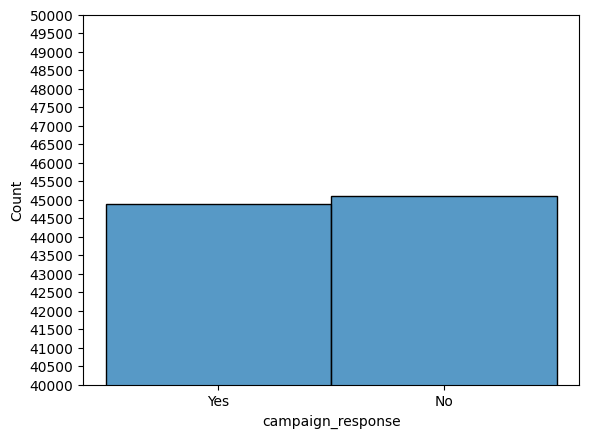

In [50]:
yes_count = response_df['campaign_response'].value_counts()['Yes']
no_count = response_df['campaign_response'].value_counts()['No']
print(f'Yes response count: {yes_count}')
print(f'No response count: {no_count}')

sns.histplot(response_df['campaign_response'])

# Histplot scale from (40000,50000) to realize the plot better
plt.ylim(40000, 50000)

# Increments of 500
plt.yticks(np.arange(40000, 50001, 500))

plt.show()

In [51]:
response_df.describe()

,customer_id,join_date,last_purchase_date,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_date,transaction_amount,campaign_customer_id,campaign_campaign_id,campaign_campaign_date
count,89989.000000,89989,89989,89989.000000,89989.000000,89989.000000,89989.000000,89989.000000,89989,89989.000000,89989.000000,89989.000000,89989
mean,4997.681005,2022-03-27 07:53:06.829501184,2023-04-25 02:41:35.264977152,43.554723,98.340419,39.079276,19.335530,64757.509051,2022-11-23 02:46:23.300181248,598.563612,4997.681005,12598.985254,2022-08-27 01:25:37.587927296
min,1.000000,2020-01-01 00:00:00,2020-01-26 00:00:00,18.000000,1.000000,1.000000,1.000000,1.000000,2020-01-16 00:00:00,10.020000,1.000000,1.000000,2020-01-06 00:00:00
25%,2497.000000,2021-02-20 00:00:00,2022-09-19 00:00:00,32.000000,14.000000,6.000000,3.000000,32453.000000,2022-02-17 00:00:00,228.630000,2497.000000,6266.000000,2021-10-12 00:00:00
50%,4998.000000,2022-03-27 00:00:00,2023-08-07 00:00:00,44.000000,52.000000,21.000000,10.000000,64668.000000,2023-01-23 00:00:00,439.160000,4998.000000,12595.000000,2022-10-03 00:00:00
75%,7458.000000,2023-05-14 00:00:00,2024-02-12 00:00:00,55.000000,138.000000,56.000000,28.000000,96916.000000,2023-10-19 00:00:00,849.800000,7458.000000,18836.000000,2023-08-18 00:00:00
max,10000.000000,2024-05-31 00:00:00,2024-05-31 00:00:00,69.000000,711.000000,303.000000,142.000000,129545.000000,2024-05-31 00:00:00,1999.990000,10000.000000,25200.000000,2024-05-31 00:00:00
std,2880.492041,NaN,NaN,14.310950,117.861670,46.018060,22.774712,37375.910646,NaN,492.154746,2880.492041,7268.477162,NaN


In [52]:
response_df.columns

Index(['customer_id', 'join_date', 'last_purchase_date', 'age', 'gender',
       'location', 'number_of_site_visits', 'number_of_emails_opened',
       'number_of_clicks', 'transaction_id', 'transaction_date',
       'transaction_amount', 'product_category', 'campaign_customer_id',
       'campaign_campaign_id', 'campaign_response', 'campaign_promotion_type',
       'campaign_campaign_date'],
      dtype='object')

<Axes: >

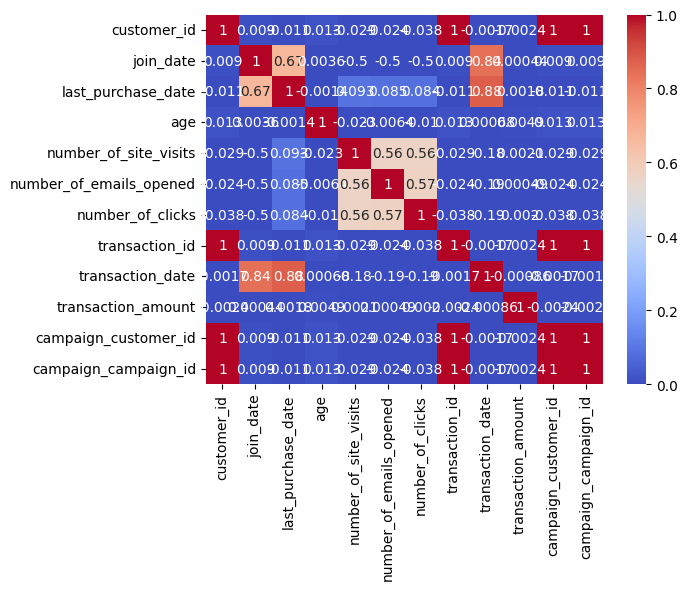

In [55]:
# Here it is seen that there is a high correlation with 'number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks'

sns.heatmap(response_df[['customer_id', 'join_date', 'last_purchase_date', 'age', 'number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks', 'transaction_id',
                        'transaction_date', 'transaction_amount', 'campaign_customer_id', 'campaign_campaign_id']].corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1)

# Calculating LTV
Customer Lifetime Value is the TOTAL value the customer has brought to a company in their lifetime. This is simply a SUM of all their transactions.

In [56]:
response_df.groupby('customer_id')['transaction_amount'].sum()

customer_id
1         3334.76
2         4214.76
3          953.87
4         7138.95
5        15524.55
           ...   
9996      1096.25
9997      2673.19
9998      3503.13
9999      6721.86
10000     4158.90
Name: transaction_amount, Length: 9589, dtype: float64

In [57]:
response_df.groupby('customer_id')['transaction_amount'].sum().sort_values()

customer_id
8345       12.05
7908       12.35
7122       17.16
7988       20.56
6681       21.80
          ...   
2501    20349.68
1833    20780.89
9902    20845.64
6633    21518.15
6795    22502.63
Name: transaction_amount, Length: 9589, dtype: float64

In [58]:
response_df.columns

Index(['customer_id', 'join_date', 'last_purchase_date', 'age', 'gender',
       'location', 'number_of_site_visits', 'number_of_emails_opened',
       'number_of_clicks', 'transaction_id', 'transaction_date',
       'transaction_amount', 'product_category', 'campaign_customer_id',
       'campaign_campaign_id', 'campaign_response', 'campaign_promotion_type',
       'campaign_campaign_date'],
      dtype='object')

# Feature Engineering

In [59]:
freq_purchases = response_df.groupby('customer_id')['transaction_id'].count().to_dict()
response_df['frequency'] = response_df['customer_id'].map(freq_purchases)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9956\856932563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['frequency'] = response_df['customer_id'].map(freq_purchases)


In [60]:
response_df['frequency'].unique()

array([ 5,  8,  4, 16, 24,  7,  3, 11,  1, 12,  2,  9, 17, 10,  6, 15, 18,
       19, 13, 14, 21, 23, 20, 25, 22])

In [61]:
# Mapping out the total transaction amount spent by every customer based on their customer id

customer_total_transaction = response_df.groupby('customer_id')['transaction_amount'].sum().to_dict()
response_df['customer_total_transaction'] = response_df['customer_id'].map(customer_total_transaction)

# Also calculating the number of days i.e lifetime of the customer from first and last purchase date 
# There are customers that have their last_purchase_date and joining date as similar dates
# Hence to avoid this issue we will add 1 day to every customer accounting for the purchases made on the joining day

response_df['lifetime_customer'] = response_df['last_purchase_date'] -  response_df['join_date'] + pd.Timedelta(days=1)

# Current date 
current_date = datetime.now().date()

# Calculate the recency in days
response_df['recency'] = (current_date - response_df['last_purchase_date'].dt.date).apply(lambda x: x.days)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9956\1635455768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['customer_total_transaction'] = response_df['customer_id'].map(customer_total_transaction)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9956\1635455768.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['lifetime_customer'] = response_df['last_purchase_date'] -  response_df['join_date'] + pd.Timedelta(days=1)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9956\1635455768.p

In [62]:
# Extracting the numerical value from timedelta object measured in days 
response_df['lifetime_customer'] = response_df['lifetime_customer'].dt.days

# Rounding the float value to 2 decimal places for better analysis
total_transaction_amt = round(response_df['customer_total_transaction'], 2)
num_days = response_df['lifetime_customer']
customer_day_spend = total_transaction_amt / num_days
response_df['Customer_day_spend'] =  round(customer_day_spend, 2)

avg_customer_spend = round(np.mean(response_df['Customer_day_spend']), 2)
print(f'Average Customer spend: {avg_customer_spend}')


Average Customer spend: 228.13


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9956\4163228040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['lifetime_customer'] = response_df['lifetime_customer'].dt.days
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9956\4163228040.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['Customer_day_spend'] =  round(customer_day_spend, 2)


In [63]:
response_df['lifetime_customer'].unique()

array([ 119,  778,  545, ...,  757, 1411, 1445])

In [64]:
# RFM Analysis
response_df[['customer_id','recency','frequency','Customer_day_spend']]

,customer_id,recency,frequency,Customer_day_spend
3,1,154,5,28.02
0,1,154,5,28.02
4,1,154,5,28.02
1,1,154,5,28.02
2,1,154,5,28.02
...,...,...,...,...
129544,10000,352,8,42.01
129539,10000,352,8,42.01
129543,10000,352,8,42.01
129538,10000,352,8,42.01


In [65]:
# Calculate quartiles for different rfm metrics
response_df['recency_quartile'] = pd.qcut(response_df['recency'], q=4, labels=False)
response_df['frequency_quartile'] = pd.qcut(response_df['frequency'], q=4, labels=False)
response_df['customer_day_spend_quartile'] = pd.qcut(response_df['Customer_day_spend'], q=4, labels=False)

# Create a rfm score column based on the quartiles
response_df['rfm_score'] = response_df['recency_quartile'] + response_df['frequency_quartile'] + response_df['customer_day_spend_quartile']

def rfm_segment(row):
    if row['rfm_score'] >= 6:
        return 'High Score'
    elif row['rfm_score'] >= 3:
        return 'Medium Score'
    else:
        return 'Low Score'
    
response_df['customer_rfm_score'] = response_df.apply(rfm_segment, axis = 1)
response_df[['customer_id','recency','frequency','Customer_day_spend', 'rfm_score', 'customer_rfm_score']]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9956\3372370466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['recency_quartile'] = pd.qcut(response_df['recency'], q=4, labels=False)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9956\3372370466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['frequency_quartile'] = pd.qcut(response_df['frequency'], q=4, labels=False)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9956\3372370466.py:4: SettingWithCopyWarning: 
A value is trying to

,customer_id,recency,frequency,Customer_day_spend,rfm_score,customer_rfm_score
3,1,154,5,28.02,2,Low Score
0,1,154,5,28.02,2,Low Score
4,1,154,5,28.02,2,Low Score
1,1,154,5,28.02,2,Low Score
2,1,154,5,28.02,2,Low Score
...,...,...,...,...,...,...
129544,10000,352,8,42.01,3,Medium Score
129539,10000,352,8,42.01,3,Medium Score
129543,10000,352,8,42.01,3,Medium Score
129538,10000,352,8,42.01,3,Medium Score


In [66]:
response_df.sort_values(by = 'Customer_day_spend')[['customer_id','recency','frequency','Customer_day_spend', 'rfm_score', 'customer_rfm_score']]

,customer_id,recency,frequency,Customer_day_spend,rfm_score,customer_rfm_score
86626,6681,264,1,0.02,1,Low Score
76137,5867,226,1,0.02,1,Low Score
109693,8466,284,1,0.03,1,Low Score
5500,442,186,1,0.04,0,Low Score
21499,1670,269,1,0.04,1,Low Score
...,...,...,...,...,...,...
24571,1917,230,25,19876.28,7,High Score
24570,1917,230,25,19876.28,7,High Score
24569,1917,230,25,19876.28,7,High Score
24568,1917,230,25,19876.28,7,High Score


In [67]:
print(response_df['rfm_score'].unique())
print(response_df['customer_rfm_score'].unique())

[2 1 7 3 0 6 8 5 4 9]
['Low Score' 'High Score' 'Medium Score']


In [68]:
print(response_df['customer_rfm_score'].value_counts())

customer_rfm_score
Medium Score    42520
High Score      29642
Low Score       17827
Name: count, dtype: int64


## Defining Output variable for Model

In [69]:
response_df['Customer_day_spend'].describe()

count    89989.000000
mean       228.126973
std       1166.120058
min          0.020000
25%         11.280000
50%         25.160000
75%         75.620000
max      19876.280000
Name: Customer_day_spend, dtype: float64

<Axes: xlabel='customer_id', ylabel='Customer_day_spend'>

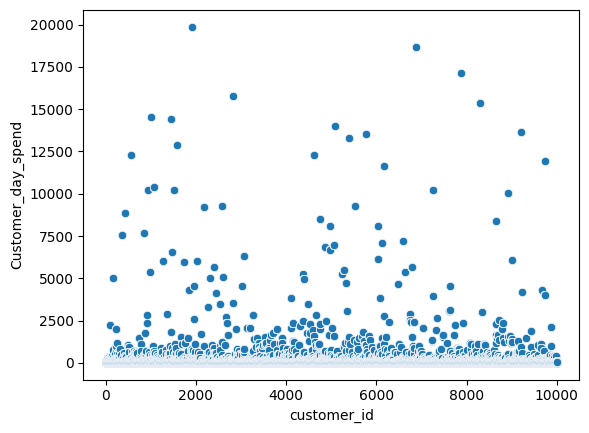

In [70]:
sns.scatterplot(x = 'customer_id', y = 'Customer_day_spend', data = response_df)

In [71]:
range_percentile = response_df['Customer_day_spend'].quantile([0.3, 0.4, 0.5, 0.6, 0.7])
print(range_percentile)

0.3    13.24
0.4    18.00
0.5    25.16
0.6    36.67
0.7    57.58
Name: Customer_day_spend, dtype: float64


In [72]:
# Mean value ofcustomer_spend is really high due to outliers
# Considered 70% quantile range value as threshold for a high value customer (57.58 ~ 58)
# Here 1: High Value Customer, 0: Low Value Customer (based on avg spend per day)

response_df['value_customer'] = response_df['Customer_day_spend'].apply(lambda x: 1 if x >= 58 else 0)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9956\3108654693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df['value_customer'] = response_df['Customer_day_spend'].apply(lambda x: 1 if x >= 58 else 0)


In [73]:
response_df[response_df['value_customer'] == 1].groupby('customer_id')['Customer_day_spend'].mean().sort_values()

customer_id
9588       58.00
6315       58.04
9970       58.05
2049       58.06
6897       58.06
          ...   
8293    15388.12
2831    15799.66
7877    17115.17
6877    18700.50
1917    19876.28
Name: Customer_day_spend, Length: 2065, dtype: float64

In [74]:
response_df[response_df['value_customer'] == 1]['Customer_day_spend'].mean()

np.float64(719.1742709071249)

In [75]:
# Checking for consistent values in 'value_customer' for same customer_ids
response_df[response_df['customer_id'] == 1]['value_customer']

3    0
0    0
4    0
1    0
2    0
Name: value_customer, dtype: int64

In [76]:
# Group by 'customer_id' and check for consistency in 'value_customer'
consistent = response_df.groupby('customer_id')['value_customer'].nunique() == 1

# Check if all customer_ids are consistent
if consistent.all():
    print("All unique customer_ids have the consistent values in output column")
else:
    inconsistent_ids = consistent[~consistent].index.tolist()
    print("All unique customer_ids do not have the consistent values in output column")
    print(f'Inconsistent customer_id: {inconsistent_ids}')

All unique customer_ids have the consistent values in output column


In [77]:
# Count of Low value and High Value Customers
response_df.groupby('value_customer')['customer_id'].count()

value_customer
0    63168
1    26821
Name: customer_id, dtype: int64

In [78]:
response_df[['customer_id','recency','frequency','Customer_day_spend', 'value_customer']]

,customer_id,recency,frequency,Customer_day_spend,value_customer
3,1,154,5,28.02,0
0,1,154,5,28.02,0
4,1,154,5,28.02,0
1,1,154,5,28.02,0
2,1,154,5,28.02,0
...,...,...,...,...,...
129544,10000,352,8,42.01,0
129539,10000,352,8,42.01,0
129543,10000,352,8,42.01,0
129538,10000,352,8,42.01,0


## One-Hot Encoding Categorical Variables for Model

In [79]:
# Using one-hot encoding for gender, product category, campaign response and promotion type column

encoded_gender = pd.get_dummies(response_df['gender'], prefix='gender')
encoded_category = pd.get_dummies(response_df['product_category'], prefix='product_category')
encoded_response = pd.get_dummies(response_df['campaign_response'], prefix='campaign_response')
encoded_promotion = pd.get_dummies(response_df['campaign_promotion_type'], prefix='campaign_promotion_type')

response_df = pd.concat([response_df, encoded_gender, encoded_category, encoded_response, encoded_promotion], axis=1)

In [80]:
response_df

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,...,gender_Male,gender_Other,product_category_Clothing,product_category_Electronics,product_category_Home Goods,campaign_response_No,campaign_response_Yes,campaign_promotion_type_Buy One Get One,campaign_promotion_type_Discount,campaign_promotion_type_Free Shipping
3,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,4,...,False,False,False,True,False,False,True,True,False,False
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,...,False,False,True,False,False,True,False,False,True,False
4,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,5,...,False,False,False,True,False,True,False,False,True,False
1,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,2,...,False,False,False,False,True,True,False,True,False,False
2,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,3,...,False,False,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129544,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,129545,...,True,False,False,False,True,False,True,False,True,False
129539,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,129540,...,True,False,True,False,False,False,True,False,True,False
129543,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,129544,...,True,False,False,False,True,False,True,False,True,False
129538,10000,2023-05-26,2023-09-01,67.0,Male,Hollytown,12,12,7,129539,...,True,False,False,False,True,False,True,False,True,False


In [81]:
response_df.columns

Index(['customer_id', 'join_date', 'last_purchase_date', 'age', 'gender',
       'location', 'number_of_site_visits', 'number_of_emails_opened',
       'number_of_clicks', 'transaction_id', 'transaction_date',
       'transaction_amount', 'product_category', 'campaign_customer_id',
       'campaign_campaign_id', 'campaign_response', 'campaign_promotion_type',
       'campaign_campaign_date', 'frequency', 'customer_total_transaction',
       'lifetime_customer', 'recency', 'Customer_day_spend',
       'recency_quartile', 'frequency_quartile', 'customer_day_spend_quartile',
       'rfm_score', 'customer_rfm_score', 'value_customer', 'gender_Female',
       'gender_Male', 'gender_Other', 'product_category_Clothing',
       'product_category_Electronics', 'product_category_Home Goods',
       'campaign_response_No', 'campaign_response_Yes',
       'campaign_promotion_type_Buy One Get One',
       'campaign_promotion_type_Discount',
       'campaign_promotion_type_Free Shipping'],
      dty

In [82]:
response_df.duplicated().sum()

np.int64(0)

In [83]:
response_df.count()['age']

np.int64(89989)

In [84]:
response_df[['customer_id','recency','frequency','Customer_day_spend', 'rfm_score', 'value_customer']].sort_values(by = 'Customer_day_spend')

,customer_id,recency,frequency,Customer_day_spend,rfm_score,value_customer
86626,6681,264,1,0.02,1,0
76137,5867,226,1,0.02,1,0
109693,8466,284,1,0.03,1,0
5500,442,186,1,0.04,0,0
21499,1670,269,1,0.04,1,0
...,...,...,...,...,...,...
24571,1917,230,25,19876.28,7,1
24570,1917,230,25,19876.28,7,1
24569,1917,230,25,19876.28,7,1
24568,1917,230,25,19876.28,7,1


In [85]:
model_data = response_df.groupby('customer_id')['value_customer'].mean()
sum(model_data == 1)

2065

# Model Building: Logistic Regression

In [86]:
model_df = response_df.groupby('customer_id').agg({
    'age': 'mean',  
    'number_of_site_visits': 'sum', 
    'number_of_emails_opened': 'sum',
    'number_of_clicks': 'sum',
    'recency': 'mean',  
    'frequency': 'mean',
    'gender_Female': 'max',
    'gender_Male': 'max', 
    'gender_Other': 'max',
    'product_category_Clothing': 'max',
    'product_category_Electronics': 'max',
    'product_category_Home Goods': 'max',
    'campaign_response_No': 'max',
    'campaign_response_Yes': 'max',
    'campaign_promotion_type_Buy One Get One': 'max',
    'campaign_promotion_type_Discount': 'max',
    'campaign_promotion_type_Free Shipping': 'max',
    'value_customer': 'mean'
})

# Reset index to convert the groupby object back to a DataFrame
model_df.reset_index(inplace=True)

# Split data into input and output variables

X = model_df[['age', 'number_of_site_visits', 'number_of_emails_opened','number_of_clicks',
                 'recency','frequency',
                'gender_Female', 'gender_Male', 'gender_Other', 'product_category_Clothing', 
                'product_category_Electronics','product_category_Home Goods', 'campaign_response_No',
                'campaign_response_Yes', 'campaign_promotion_type_Buy One Get One','campaign_promotion_type_Discount',
                'campaign_promotion_type_Free Shipping']]

y =  model_df['value_customer']

In [87]:
model_df[model_df['value_customer'] == 1]

,customer_id,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,recency,frequency,gender_Female,gender_Male,gender_Other,product_category_Clothing,product_category_Electronics,product_category_Home Goods,campaign_response_No,campaign_response_Yes,campaign_promotion_type_Buy One Get One,campaign_promotion_type_Discount,campaign_promotion_type_Free Shipping,value_customer
10,11,60.0,396,36,12,587.0,12.0,False,True,False,True,True,True,True,True,False,True,True,1.0
13,14,23.0,336,112,112,986.0,16.0,True,False,False,True,True,True,False,True,True,True,False,1.0
19,20,22.0,18,54,9,1292.0,9.0,True,False,False,True,True,True,True,True,False,True,True,1.0
34,39,44.0,36,24,6,570.0,6.0,True,False,False,True,True,True,True,True,False,True,True,1.0
38,43,58.0,408,24,60,410.0,12.0,False,True,False,True,True,True,True,False,True,True,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9567,9979,44.0,120,36,12,209.0,12.0,True,False,False,True,True,True,True,True,True,False,True,1.0
9569,9981,50.0,504,156,60,1276.0,12.0,True,False,False,True,True,True,True,True,False,True,False,1.0
9579,9991,32.0,102,102,34,108.0,17.0,False,True,False,True,True,True,True,True,False,True,True,1.0
9580,9992,19.0,117,13,13,197.0,13.0,True,False,False,True,True,True,True,True,True,False,True,1.0


In [88]:
# Training and Testing the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
# Building a Logistic Regression Model
logreg_model = LogisticRegression()

# Train the model on training data
logreg_model.fit(X_train, y_train)

# Making predictions based on the model
model_prediction = logreg_model.predict(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Evaluation: Logistic Regression

In [90]:
# Evaluating the model performance
model_accuracy = accuracy_score(y_test, model_prediction)
print(f'Model Accuracy: {model_accuracy}')

class_report = classification_report(y_test, model_prediction)
print(f'Classification Report: {class_report}')

# Measuring Features and coefficients for Logistic Regresssion Model
logreg_coeff = logreg_model.coef_
logreg_intercept = logreg_model.intercept_

print(f'Coefficients: {logreg_coeff}')
print(f'Intercept: {logreg_intercept}')

Model Accuracy: 0.9283976364268335
Classification Report:               precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      2293
         1.0       0.87      0.76      0.81       584

    accuracy                           0.93      2877
   macro avg       0.90      0.87      0.88      2877
weighted avg       0.93      0.93      0.93      2877

Coefficients: [[-8.04137234e-03 -3.05914444e-03 -8.15904697e-03 -1.84490421e-02
  -3.94467808e-04  6.13824510e-01 -5.49269158e-01 -4.83021663e-01
  -1.37419600e-01 -7.61591942e-01  2.16351664e-01 -4.48673024e-01
  -2.82499671e-01 -2.32259671e-01  1.56505652e-01 -5.89854543e-02
   1.14971355e-01]]
Intercept: [-1.18571776]


In [91]:
# Comparing Predicted and original dataframe Values
for orgin_val, pred_val in zip(y_test, model_prediction):
    print(f'Original Value: {orgin_val}, Predicted Value: {pred_val}')

Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 1.0, Predicted Value: 1.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 1.0
Original Value: 1.0, Predicted Value: 1.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Val

In [92]:
# Counting values correctly predicted by the Logistic Regression model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, model_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

# For 30% of Testing Data
print('For a Logistic Regression Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Logistic Regression Model:
Number of Total Predictions: 2877
Number of Correct Predictions: 2671
Number of Wrong Predictions: 206


In [93]:
# Check for Overfitting with Cross-Validation
cv_scores = cross_val_score(logreg_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Checking for missing values
print(f"Number of missing values in each column:\n{pd.DataFrame(X).isnull().sum()}")

# Check for Class Imbalance
class_distribution = np.bincount(y)
for i, count in enumerate(class_distribution):
    print(f"Number of instances of class {i}: {count}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, model_prediction)
print("Confusion Matrix:")
print(conf_matrix)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Cross-validation scores: [0.9270073  0.91918665 0.91553702 0.92179353 0.92123109]
Mean cross-validation score: 0.9209511189875125
Number of missing values in each column:
age                                        0
number_of_site_visits                      0
number_of_emails_opened                    0
number_of_clicks                           0
recency                                    0
frequency                                  0
gender_Female                              0
gender_Male                                0
gender_Other                               0
product_category_Clothing                  0
product_category_Electronics               0
product_category_Home Goods                0
campaign_response_No                       0
campaign_response_Yes                      0
campaign_promotion_type_Buy One Get One    0
campaign_promotion_type_Discount           0
campaign_promotion_type_Free Shipping      0
dtype: int64
Number of instances of class 0: 7524
Number of inst

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


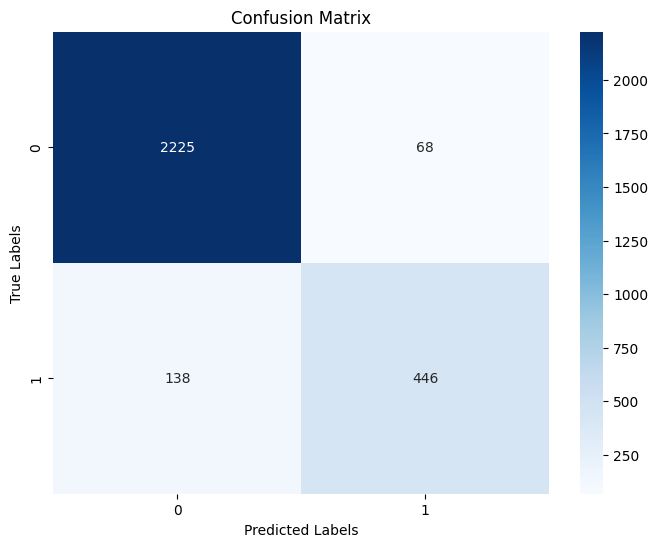

In [94]:
# Plot confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


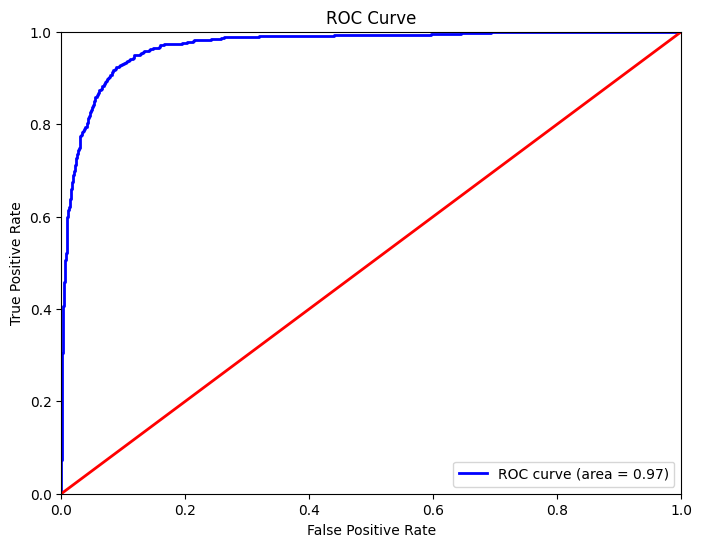

In [95]:
# Calculate the ROC curve
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()

# Model Building: Decision Tree

In [96]:
model_df = response_df.groupby('customer_id').agg({
    'age': 'mean',  
    'number_of_site_visits': 'sum', 
    'number_of_emails_opened': 'sum',
    'number_of_clicks': 'sum',
    'recency': 'mean',  
    'frequency': 'mean',
    'gender_Female': 'max',
    'gender_Male': 'max', 
    'gender_Other': 'max',
    'product_category_Clothing': 'max',
    'product_category_Electronics': 'max',
    'product_category_Home Goods': 'max',
    'campaign_response_No': 'max',
    'campaign_response_Yes': 'max',
    'campaign_promotion_type_Buy One Get One': 'max',
    'campaign_promotion_type_Discount': 'max',
    'campaign_promotion_type_Free Shipping': 'max',
    'value_customer': 'mean'
})

# Reset index to convert the groupby object back to a DataFrame
model_df.reset_index(inplace=True)

# Split data into input and output variables

X = model_df[['age', 'number_of_site_visits', 'number_of_emails_opened','number_of_clicks',
                 'recency','frequency',
                'gender_Female', 'gender_Male', 'gender_Other', 'product_category_Clothing', 
                'product_category_Electronics','product_category_Home Goods', 'campaign_response_No',
                'campaign_response_Yes', 'campaign_promotion_type_Buy One Get One','campaign_promotion_type_Discount',
                'campaign_promotion_type_Free Shipping']]

y =  model_df['value_customer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building a Decision Tree Model
dt_model = DecisionTreeClassifier()

# Making Predictions for the decision tree model
dt_model.fit(X_train, y_train)
dt_prediction = dt_model.predict(X_test)

In [97]:
X.duplicated().sum()

np.int64(0)

# Model Evaluation: Decision Tree

In [98]:
# Evaluating Model Performance
dt_accuracy = accuracy_score(y_test, dt_prediction)
dt_report = classification_report(y_test, dt_prediction)

print(f'Accuracy: {dt_accuracy}')
print(f'Classification Report: {dt_report}')

# Measuring Features for Decision Tree Model

dt_feature = dt_model.feature_importances_
print(f'Coefficients: {dt_feature}')

Accuracy: 0.921793534932221
Classification Report:               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      2293
         1.0       0.82      0.79      0.80       584

    accuracy                           0.92      2877
   macro avg       0.88      0.87      0.88      2877
weighted avg       0.92      0.92      0.92      2877

Coefficients: [0.03899426 0.16550048 0.1390167  0.24244606 0.04442413 0.32349528
 0.00396011 0.00500368 0.00196319 0.00232595 0.0037     0.00191747
 0.00685029 0.00704015 0.00755144 0.00165401 0.00415678]


In [99]:
# Check for Overfitting with Cross-Validation
cv_scores = cross_val_score(dt_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Checking for missing values
print(f"Number of missing values in each column:\n{pd.DataFrame(X).isnull().sum()}")

# Check for Class Imbalance
class_distribution = np.bincount(y)
for i, count in enumerate(class_distribution):
    print(f"Number of instances of class {i}: {count}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, dt_prediction)
print("Confusion Matrix:")
print(conf_matrix)

Cross-validation scores: [0.91501564 0.91501564 0.91240876 0.91345151 0.91236307]
Mean cross-validation score: 0.9136509241988835
Number of missing values in each column:
age                                        0
number_of_site_visits                      0
number_of_emails_opened                    0
number_of_clicks                           0
recency                                    0
frequency                                  0
gender_Female                              0
gender_Male                                0
gender_Other                               0
product_category_Clothing                  0
product_category_Electronics               0
product_category_Home Goods                0
campaign_response_No                       0
campaign_response_Yes                      0
campaign_promotion_type_Buy One Get One    0
campaign_promotion_type_Discount           0
campaign_promotion_type_Free Shipping      0
dtype: int64
Number of instances of class 0: 7524
Number of inst

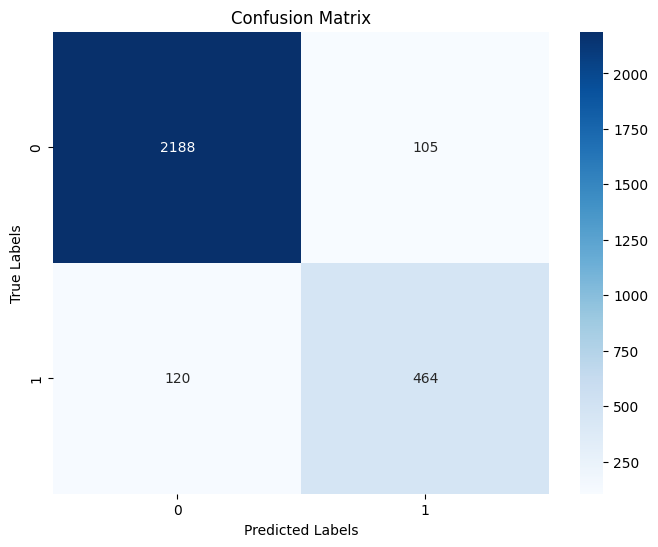

In [100]:
# Plot confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

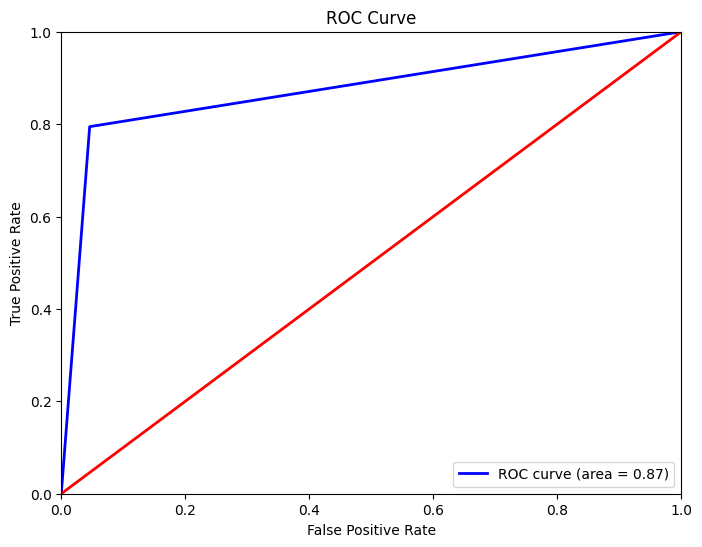

In [101]:
# Calculate the ROC curve
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()

In [102]:
# Comparing Predicted and original dataframe Values
for orgin_val, pred_val in zip(y_test, dt_prediction):
    print(f'Original Value: {orgin_val}, Predicted Value: {pred_val}')

Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 1.0, Predicted Value: 1.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 1.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Val

In [103]:
# Counting values correctly predicted by the decision tree model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, dt_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

# For 30% of Testing Data
print('For a Decision Tree Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Decision Tree Model:
Number of Total Predictions: 2877
Number of Correct Predictions: 2652
Number of Wrong Predictions: 225


# Model Building: AdaBoost

In [104]:
model_df = response_df.groupby('customer_id').agg({
    'age': 'mean',  
    'number_of_site_visits': 'sum', 
    'number_of_emails_opened': 'sum',
    'number_of_clicks': 'sum',
    'recency': 'mean',  
    'frequency': 'mean',
    'gender_Female': 'max',
    'gender_Male': 'max', 
    'gender_Other': 'max',
    'product_category_Clothing': 'max',
    'product_category_Electronics': 'max',
    'product_category_Home Goods': 'max',
    'campaign_response_No': 'max',
    'campaign_response_Yes': 'max',
    'campaign_promotion_type_Buy One Get One': 'max',
    'campaign_promotion_type_Discount': 'max',
    'campaign_promotion_type_Free Shipping': 'max',
    'value_customer': 'mean'
})

# Reset index to convert the groupby object back to a DataFrame
model_df.reset_index(inplace=True)

# Split data into input and output variables

X = model_df[['age', 'number_of_site_visits', 'number_of_emails_opened','number_of_clicks',
                 'recency','frequency',
                'gender_Female', 'gender_Male', 'gender_Other', 'product_category_Clothing', 
                'product_category_Electronics','product_category_Home Goods', 'campaign_response_No',
                'campaign_response_Yes', 'campaign_promotion_type_Buy One Get One','campaign_promotion_type_Discount',
                'campaign_promotion_type_Free Shipping']]

y =  model_df['value_customer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

Best Parameters for AdaBoost Model: 200


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

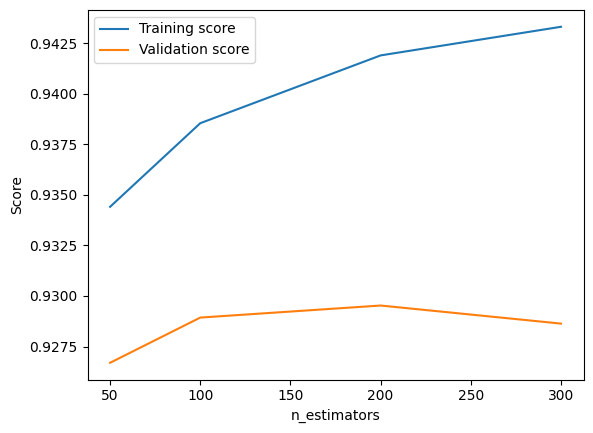

In [105]:
# Defining Model
adaboost_model = AdaBoostClassifier()

# Define param grid to check for range of n_estimators
param_grid = {'n_estimators': [50, 100, 200, 300]}  

# Perform Grid Search with cross-validation for the adaboost model
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Find best values of n_estimators
best_n_estimators = grid_search.best_params_['n_estimators']
print(f'Best Parameters for AdaBoost Model: {best_n_estimators}')

# Plotting the values for best n_estimators
train_scores, test_scores = validation_curve(
    AdaBoostClassifier(), X_train, y_train, param_name='n_estimators', param_range = param_grid['n_estimators'], cv=5
    )

plt.figure()
plt.plot(param_grid['n_estimators'], np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_grid['n_estimators'], np.mean(test_scores, axis=1), label='Validation score')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend()
plt.show()


In [106]:
# From the Coefficients it is observed that some input variables have not influence on the predicted value
# Hence let's test the model based with n_estimators = 300 to handle more variance within the dataset

model_df = response_df.groupby('customer_id').agg({
    'age': 'mean',  
    'number_of_site_visits': 'sum', 
    'number_of_emails_opened': 'sum',
    'number_of_clicks': 'sum',
    'recency': 'mean',  
    'frequency': 'mean',
    'gender_Female': 'max',
    'gender_Male': 'max', 
    'gender_Other': 'max',
    'product_category_Clothing': 'max',
    'product_category_Electronics': 'max',
    'product_category_Home Goods': 'max',
    'campaign_response_No': 'max',
    'campaign_response_Yes': 'max',
    'campaign_promotion_type_Buy One Get One': 'max',
    'campaign_promotion_type_Discount': 'max',
    'campaign_promotion_type_Free Shipping': 'max',
    'value_customer': 'mean'
})

# Reset index to convert the groupby object back to a DataFrame
model_df.reset_index(inplace=True)

# Split data into input and output variables

X = model_df[['age', 'number_of_site_visits', 'number_of_emails_opened','number_of_clicks',
                 'recency','frequency',
                'gender_Female', 'gender_Male', 'gender_Other', 'product_category_Clothing', 
                'product_category_Electronics','product_category_Home Goods', 'campaign_response_No',
                'campaign_response_Yes', 'campaign_promotion_type_Buy One Get One','campaign_promotion_type_Discount',
                'campaign_promotion_type_Free Shipping']]

y =  model_df['value_customer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building a New AdaBoost Model with n_estimators = 300

adaboost_model = AdaBoostClassifier(n_estimators = 300, random_state = 42)

# Fitting and Making Predictions for the decision tree model
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# Model Evaluation: AdaBoost

In [107]:
# Evaluating Model Performance
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
adaboost_report = classification_report(y_test, adaboost_predictions)

print(f'Accuracy: {adaboost_accuracy}')
print(f'Classification Report: {adaboost_report}')

# Measuring Features for Adaboost Model
adaboost_feature = adaboost_model.feature_importances_

print(f'Coefficients: {adaboost_feature}')

Accuracy: 0.9360444907890163
Classification Report:               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      2293
         1.0       0.86      0.82      0.84       584

    accuracy                           0.94      2877
   macro avg       0.91      0.89      0.90      2877
weighted avg       0.94      0.94      0.94      2877

Coefficients: [0.09       0.16333333 0.18333333 0.22666667 0.18       0.13666667
 0.00333333 0.         0.         0.00333333 0.00666667 0.
 0.00333333 0.         0.         0.00333333 0.        ]


Confusion Matrix:
[[2213   80]
 [ 104  480]]


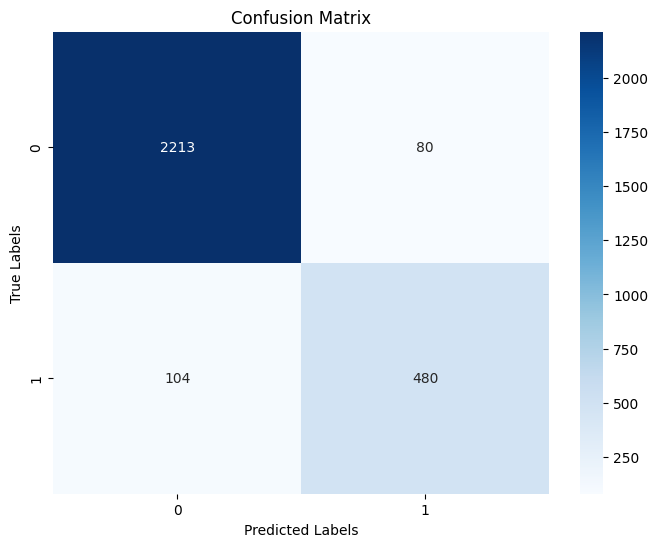

In [108]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, adaboost_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

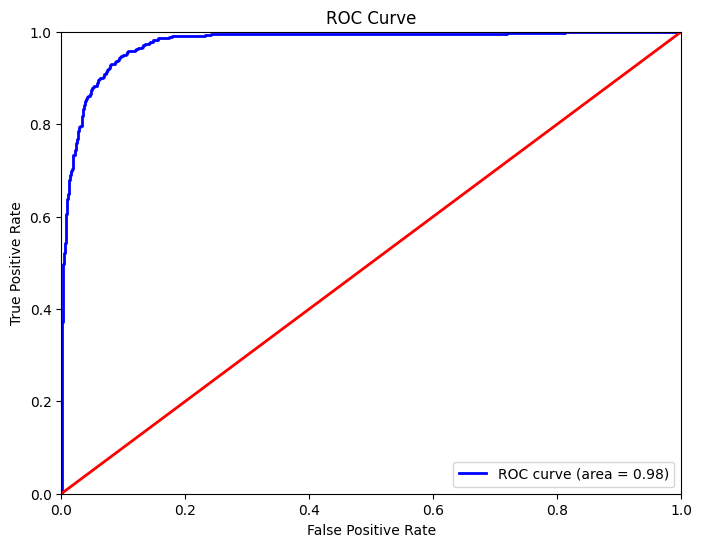

In [109]:
# Calculate the ROC curve
y_pred_prob = adaboost_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()

In [110]:
# Comparing Predicted and original dataframe Values
for orgin_val, pred_val in zip(y_test, adaboost_predictions):
    print(f'Original Value: {orgin_val}, Predicted Value: {pred_val}')

Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 1.0, Predicted Value: 1.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 1.0
Original Value: 1.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Value: 0.0
Original Value: 0.0, Predicted Val

In [111]:
# Counting values correctly predicted by the Adaboost model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, adaboost_predictions):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

# For 30% of Testing Data
print('For a AdaBoost Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a AdaBoost Model:
Number of Total Predictions: 2877
Number of Correct Predictions: 2693
Number of Wrong Predictions: 184


In [112]:
# Check for Overfitting with Cross-Validation
cv_scores = cross_val_score(adaboost_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Checking for missing values
print(f"Number of missing values in each column:\n{pd.DataFrame(X).isnull().sum()}")

# Check for Class Imbalance
class_distribution = np.bincount(y)
for i, count in enumerate(class_distribution):
    print(f"Number of instances of class {i}: {count}")

# Evaluate Model Using Additional Metrics
# Confusion matrix
conf_matrix = confusion_matrix(y_test, adaboost_predictions)
print("Confusion Matrix:")
print(conf_matrix)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

Cross-validation scores: [0.93013556 0.92961418 0.93222106 0.92387904 0.93218571]
Mean cross-validation score: 0.9296071100841328
Number of missing values in each column:
age                                        0
number_of_site_visits                      0
number_of_emails_opened                    0
number_of_clicks                           0
recency                                    0
frequency                                  0
gender_Female                              0
gender_Male                                0
gender_Other                               0
product_category_Clothing                  0
product_category_Electronics               0
product_category_Home Goods                0
campaign_response_No                       0
campaign_response_Yes                      0
campaign_promotion_type_Buy One Get One    0
campaign_promotion_type_Discount           0
campaign_promotion_type_Free Shipping      0
dtype: int64
Number of instances of class 0: 7524
Number of inst